In [1]:
year=2019
month=6

In [2]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [3]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=conn)
conn.close()

In [5]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [7]:
def get_summary(data, career):
    
    salaries = data.monthly_salary.values
    headcounts = data.headcount.values
    head_count=np.sum(headcounts)
    salary_average=np.average(salaries, weights=headcounts)
    q = weighted.weighted_quantile(salaries,[0.025,0.5,0.975],headcounts)
    print(f"2019年{month}月全国招收{career}{head_count}人。2019年{month}月全国{career}平均工资{salary_average:.0f}元，工资中位数{q[1]:.0f}元，其中95%的人的工资介于{q[0]:.0f}元到{q[2]:.0f}元。\r\n")
    
get_summary(data, '程序员')

2019年6月全国招收程序员308802人。2019年6月全国程序员平均工资13210元，工资中位数12000元，其中95%的人的工资介于3750元到35000元。



In [8]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [9]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,21614,5250,20000,45833,10589,3.43%
1,算法工程师,19691,5000,17500,45000,24262,7.86%
3,爬虫工程师,12758,3750,12000,35000,440,0.14%
0,一般程序员,12310,3750,11500,30000,273483,88.56%
4,生物信息工程师,10304,7000,10875,14000,28,0.01%


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17353,3750,15000,45000,27741,8.98%
上海,16406,5250,15000,37500,48587,15.73%
广东,14408,4376,12500,35000,78827,25.53%
浙江,13870,3750,12500,35000,19260,6.24%
四川,11822,3500,11500,27083,12625,4.09%
江苏,11809,3750,11500,27083,32575,10.55%
湖北,11135,4128,10000,25000,16213,5.25%
湖南,10973,3750,10347,22848,6953,2.25%
天津,10919,4491,9000,22500,2465,0.80%
陕西,10767,4500,10000,22500,7471,2.42%


In [11]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print(f"2019年{month}月{row[0]}招收{career}{row[5]}人。2019年{month}月{row[0]}{career}平均工资{row[1]:.0f}元，工资中位数{row[3]:.0f}元，其中95%的人的工资介于{row[2]:.0f}元到{row[4]:.0f}元。\r\n")


In [12]:
describe(data_city,'程序员')

2019年6月北京招收程序员27741人。2019年6月北京程序员平均工资17353元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年6月上海招收程序员48587人。2019年6月上海程序员平均工资16406元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年6月广东招收程序员78827人。2019年6月广东程序员平均工资14408元，工资中位数12500元，其中95%的人的工资介于4376元到35000元。

2019年6月浙江招收程序员19260人。2019年6月浙江程序员平均工资13870元，工资中位数12500元，其中95%的人的工资介于3750元到35000元。

2019年6月四川招收程序员12625人。2019年6月四川程序员平均工资11822元，工资中位数11500元，其中95%的人的工资介于3500元到27083元。

2019年6月江苏招收程序员32575人。2019年6月江苏程序员平均工资11809元，工资中位数11500元，其中95%的人的工资介于3750元到27083元。

2019年6月湖北招收程序员16213人。2019年6月湖北程序员平均工资11135元，工资中位数10000元，其中95%的人的工资介于4128元到25000元。

2019年6月湖南招收程序员6953人。2019年6月湖南程序员平均工资10973元，工资中位数10347元，其中95%的人的工资介于3750元到22848元。

2019年6月天津招收程序员2465人。2019年6月天津程序员平均工资10919元，工资中位数9000元，其中95%的人的工资介于4491元到22500元。

2019年6月陕西招收程序员7471人。2019年6月陕西程序员平均工资10767元，工资中位数10000元，其中95%的人的工资介于4500元到22500元。

2019年6月山西招收程序员768人。2019年6月山西程序员平均工资10130元，工资中位数7500元，其中95%的人的工资介于3000元到22500元。

2019年6月福建招收程序员5973人。2019年6月福建程序员平均工资10021元，工资中位数9500元，其中95%的人的工资介于3000元到20000元。

2019年6月重庆招收程序

In [13]:
data_location = pd.read_csv('../../data/provincial_capital_locations.csv', encoding='utf-8')
data_location=data_location.set_index('province')

In [14]:
from mpl_toolkits.basemap import Basemap

In [15]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        province=row[0]
        
        longitude = data_location.loc[province,'longitude']
        latitude = data_location.loc[province,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if province == '浙江':
            #x=x-400000
            y=y-100000

        elif province=='安徽':
            x=x-300000
            y=y+10000
        elif province=='江苏':
            x=x-150000
        elif province=='天津':
            y=y-50000
        elif province=='上海':
            x=x+50000
        elif province=='湖北':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(province, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(province, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


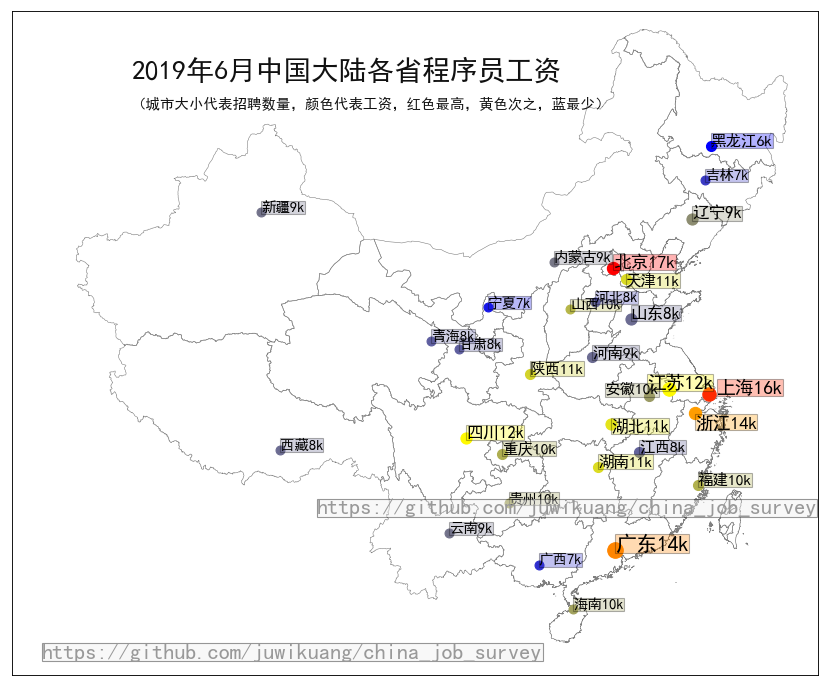

In [16]:
draw_map(data_city,2000,f'2019年{month}月中国大陆各省程序员工资')

# 算法工程师

In [17]:
get_summary(data[data.career=='算法工程师'], '算法工程师')

2019年6月全国招收算法工程师24262人。2019年6月全国算法工程师平均工资19691元，工资中位数17500元，其中95%的人的工资介于5000元到45000元。



In [18]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,25515,5250,22500,65000,3213,13.24%
上海,23541,6520,22500,45421,4589,18.91%
广东,20545,6000,18750,45000,5973,24.62%
内蒙古,19625,5250,19625,22500,6,0.02%
海南,19479,12500,15000,35000,24,0.10%
浙江,19471,3750,17500,45816,1824,7.52%
江苏,17649,4500,16592,37500,2830,11.66%
四川,15656,5250,15000,30231,1023,4.22%
湖北,15208,3819,15000,27500,1243,5.12%
青海,14583,14583,14583,14583,1,0.00%


In [19]:
describe(data_city_algorithm,'算法工程师')

2019年6月北京招收算法工程师3213人。2019年6月北京算法工程师平均工资25515元，工资中位数22500元，其中95%的人的工资介于5250元到65000元。

2019年6月上海招收算法工程师4589人。2019年6月上海算法工程师平均工资23541元，工资中位数22500元，其中95%的人的工资介于6520元到45421元。

2019年6月广东招收算法工程师5973人。2019年6月广东算法工程师平均工资20545元，工资中位数18750元，其中95%的人的工资介于6000元到45000元。

2019年6月内蒙古招收算法工程师6人。2019年6月内蒙古算法工程师平均工资19625元，工资中位数19625元，其中95%的人的工资介于5250元到22500元。

2019年6月海南招收算法工程师24人。2019年6月海南算法工程师平均工资19479元，工资中位数15000元，其中95%的人的工资介于12500元到35000元。

2019年6月浙江招收算法工程师1824人。2019年6月浙江算法工程师平均工资19471元，工资中位数17500元，其中95%的人的工资介于3750元到45816元。

2019年6月江苏招收算法工程师2830人。2019年6月江苏算法工程师平均工资17649元，工资中位数16592元，其中95%的人的工资介于4500元到37500元。

2019年6月四川招收算法工程师1023人。2019年6月四川算法工程师平均工资15656元，工资中位数15000元，其中95%的人的工资介于5250元到30231元。

2019年6月湖北招收算法工程师1243人。2019年6月湖北算法工程师平均工资15208元，工资中位数15000元，其中95%的人的工资介于3819元到27500元。

2019年6月青海招收算法工程师1人。2019年6月青海算法工程师平均工资14583元，工资中位数14583元，其中95%的人的工资介于14583元到14583元。

2019年6月陕西招收算法工程师581人。2019年6月陕西算法工程师平均工资14350元，工资中位数12926元，其中95%的人的工资介于5250元到24000元。

2019年6月安徽招收算法工程师387人。2019年6月安徽算法工程师平均工资14102元，工资中位数12500元，其

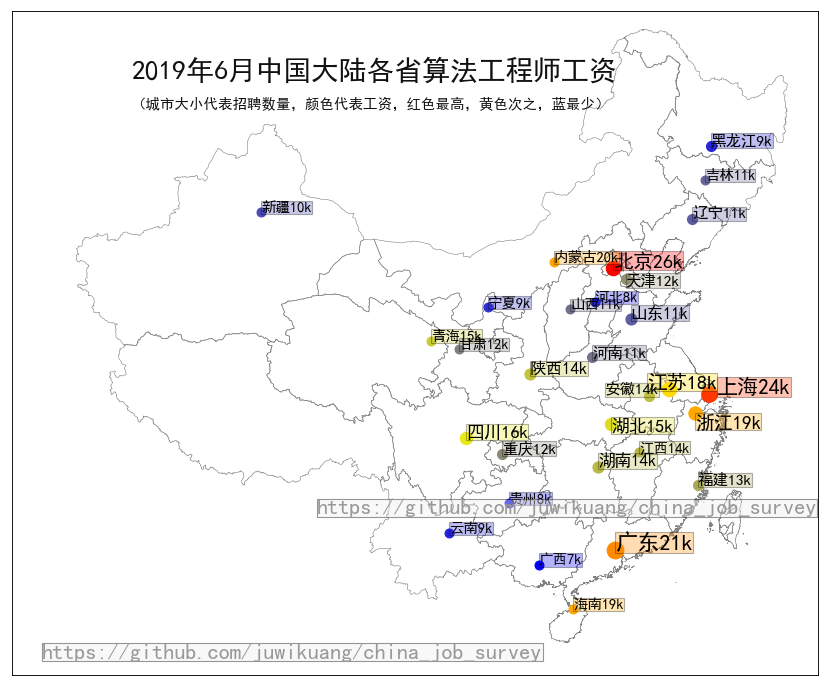

In [20]:
draw_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [21]:
get_summary(data[data.career=='系统架构师'], '系统架构师')

2019年6月全国招收系统架构师10589人。2019年6月全国系统架构师平均工资21614元，工资中位数20000元，其中95%的人的工资介于5250元到45833元。



In [22]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,29844,5194,27500,60000,1368,12.92%
上海,25823,7000,25000,50000,2036,19.23%
天津,23019,5717,18750,64200,92,0.87%
广东,21819,5250,20000,45833,3077,29.06%
浙江,21091,4766,22500,40000,689,6.51%
四川,19003,5250,17500,44150,328,3.10%
河北,18657,7000,14000,35000,54,0.51%
江苏,17822,5250,17500,35000,874,8.25%
陕西,16571,5961,17500,27500,205,1.94%
山西,16158,5000,16786,22500,19,0.18%


In [23]:
describe(data_city_architect,'系统架构师')

2019年6月北京招收系统架构师1368人。2019年6月北京系统架构师平均工资29844元，工资中位数27500元，其中95%的人的工资介于5194元到60000元。

2019年6月上海招收系统架构师2036人。2019年6月上海系统架构师平均工资25823元，工资中位数25000元，其中95%的人的工资介于7000元到50000元。

2019年6月天津招收系统架构师92人。2019年6月天津系统架构师平均工资23019元，工资中位数18750元，其中95%的人的工资介于5717元到64200元。

2019年6月广东招收系统架构师3077人。2019年6月广东系统架构师平均工资21819元，工资中位数20000元，其中95%的人的工资介于5250元到45833元。

2019年6月浙江招收系统架构师689人。2019年6月浙江系统架构师平均工资21091元，工资中位数22500元，其中95%的人的工资介于4766元到40000元。

2019年6月四川招收系统架构师328人。2019年6月四川系统架构师平均工资19003元，工资中位数17500元，其中95%的人的工资介于5250元到44150元。

2019年6月河北招收系统架构师54人。2019年6月河北系统架构师平均工资18657元，工资中位数14000元，其中95%的人的工资介于7000元到35000元。

2019年6月江苏招收系统架构师874人。2019年6月江苏系统架构师平均工资17822元，工资中位数17500元，其中95%的人的工资介于5250元到35000元。

2019年6月陕西招收系统架构师205人。2019年6月陕西系统架构师平均工资16571元，工资中位数17500元，其中95%的人的工资介于5961元到27500元。

2019年6月山西招收系统架构师19人。2019年6月山西系统架构师平均工资16158元，工资中位数16786元，其中95%的人的工资介于5000元到22500元。

2019年6月湖北招收系统架构师443人。2019年6月湖北系统架构师平均工资16076元，工资中位数15000元，其中95%的人的工资介于4644元到30000元。

2019年6月湖南招收系统架构师219人。2019年6月湖南系统架构师平均工资15068元，工资中位数13125元，其中95%的人

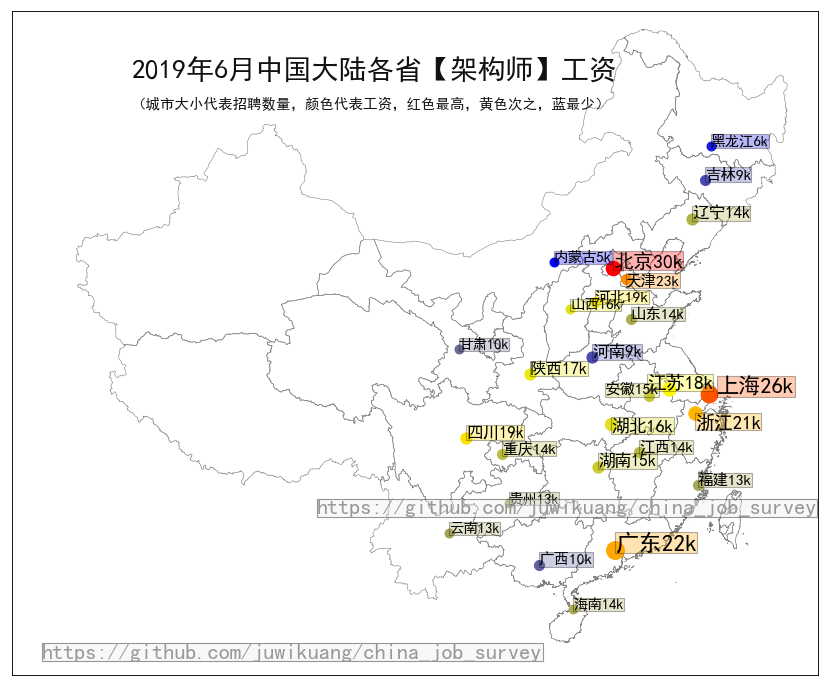

In [24]:
draw_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [25]:
get_summary(data[data.career=='生物信息工程师'], '生物信息工程师')

2019年6月全国招收生物信息工程师28人。2019年6月全国生物信息工程师平均工资10304元，工资中位数10875元，其中95%的人的工资介于7000元到14000元。



In [26]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,12500,12500,12500,12500,2,7.14%
浙江,12000,11500,12000,12500,2,7.14%
吉林,11500,11500,11500,11500,2,7.14%
广东,11375,7000,11375,14000,8,28.57%
江苏,9875,9000,9875,12500,4,14.29%
上海,9800,8000,9800,12500,5,17.86%
湖北,9000,9000,9000,9000,1,3.57%
江西,7000,7000,7000,7000,1,3.57%
广西,7000,7000,7000,7000,3,10.71%


In [27]:
describe(data_bio,'生物信息工程师')

2019年6月北京招收生物信息工程师2人。2019年6月北京生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年6月浙江招收生物信息工程师2人。2019年6月浙江生物信息工程师平均工资12000元，工资中位数12000元，其中95%的人的工资介于11500元到12500元。

2019年6月吉林招收生物信息工程师2人。2019年6月吉林生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年6月广东招收生物信息工程师8人。2019年6月广东生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2019年6月江苏招收生物信息工程师4人。2019年6月江苏生物信息工程师平均工资9875元，工资中位数9875元，其中95%的人的工资介于9000元到12500元。

2019年6月上海招收生物信息工程师5人。2019年6月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年6月湖北招收生物信息工程师1人。2019年6月湖北生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年6月江西招收生物信息工程师1人。2019年6月江西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。

2019年6月广西招收生物信息工程师3人。2019年6月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



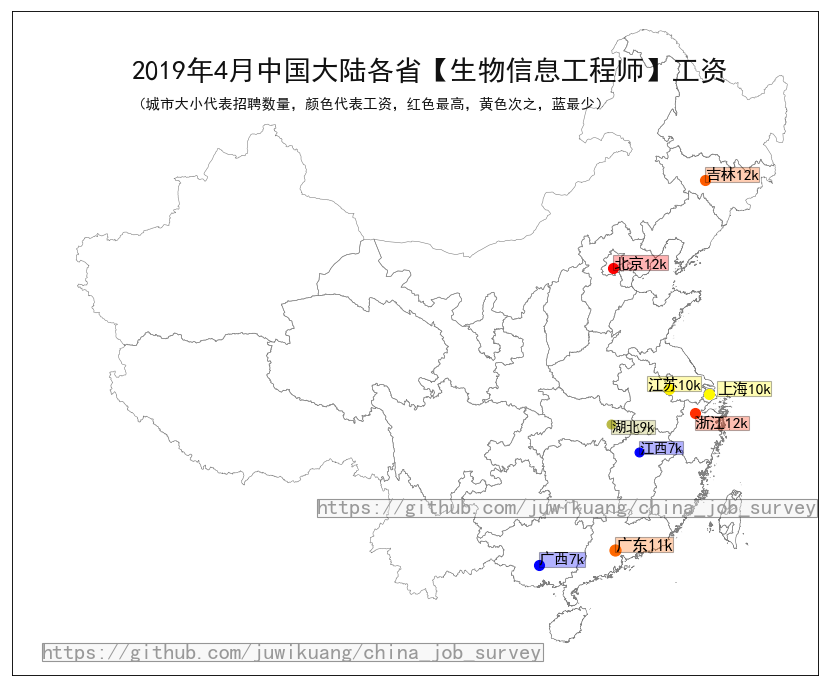

In [28]:
draw_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [29]:
get_summary(data[data.career=='爬虫工程师'], '爬虫工程师')

2019年6月全国招收爬虫工程师440人。2019年6月全国爬虫工程师平均工资12758元，工资中位数12000元，其中95%的人的工资介于3750元到35000元。



In [30]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17644,1938,17500,36979,45,10.23%
上海,14587,3832,12500,31167,86,19.55%
江苏,13258,7000,12500,22271,31,7.05%
广东,13000,4480,11429,36833,132,30.00%
山东,12524,8000,12000,27500,21,4.77%
浙江,11802,3750,11786,22500,24,5.45%
四川,9774,2250,11500,17500,31,7.05%
湖南,9650,7000,9167,16500,30,6.82%
河南,5803,5000,5250,9000,19,4.32%


In [31]:
describe(data_spider, '爬虫工程师')

2019年6月北京招收爬虫工程师45人。2019年6月北京爬虫工程师平均工资17644元，工资中位数17500元，其中95%的人的工资介于1938元到36979元。

2019年6月上海招收爬虫工程师86人。2019年6月上海爬虫工程师平均工资14587元，工资中位数12500元，其中95%的人的工资介于3832元到31167元。

2019年6月江苏招收爬虫工程师31人。2019年6月江苏爬虫工程师平均工资13258元，工资中位数12500元，其中95%的人的工资介于7000元到22271元。

2019年6月广东招收爬虫工程师132人。2019年6月广东爬虫工程师平均工资13000元，工资中位数11429元，其中95%的人的工资介于4480元到36833元。

2019年6月山东招收爬虫工程师21人。2019年6月山东爬虫工程师平均工资12524元，工资中位数12000元，其中95%的人的工资介于8000元到27500元。

2019年6月浙江招收爬虫工程师24人。2019年6月浙江爬虫工程师平均工资11802元，工资中位数11786元，其中95%的人的工资介于3750元到22500元。

2019年6月四川招收爬虫工程师31人。2019年6月四川爬虫工程师平均工资9774元，工资中位数11500元，其中95%的人的工资介于2250元到17500元。

2019年6月湖南招收爬虫工程师30人。2019年6月湖南爬虫工程师平均工资9650元，工资中位数9167元，其中95%的人的工资介于7000元到16500元。

2019年6月河南招收爬虫工程师19人。2019年6月河南爬虫工程师平均工资5803元，工资中位数5250元，其中95%的人的工资介于5000元到9000元。



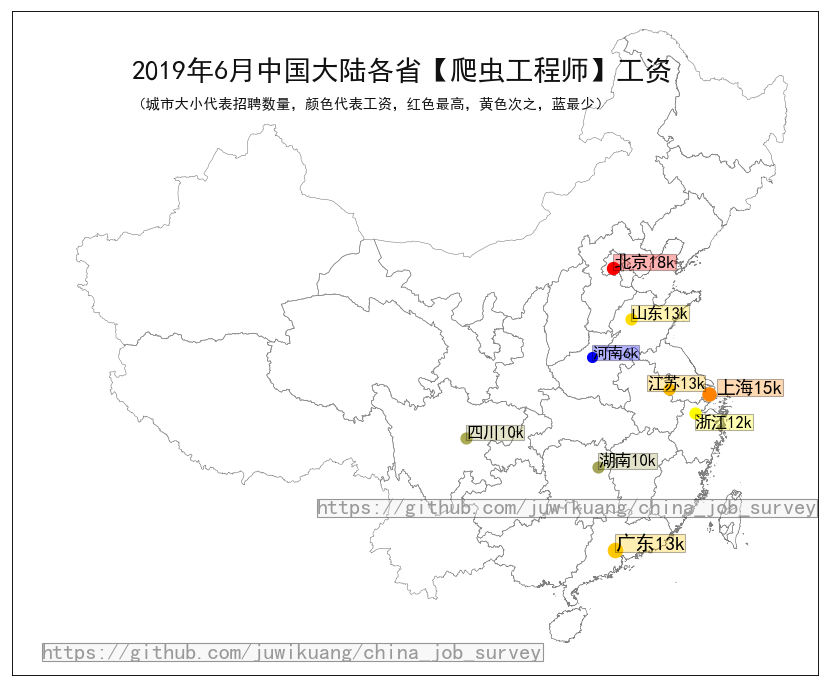

In [32]:
draw_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [33]:
get_summary(data[data.pl_java==1], 'Java程序员')

2019年6月全国招收Java程序员141416人。2019年6月全国Java程序员平均工资13247元，工资中位数12500元，其中95%的人的工资介于3750元到32500元。



In [34]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
上海,16821,5250,15000,37500,21516,15.21%
北京,16507,4500,14000,40000,13709,9.69%
广东,14549,4450,12500,32500,35032,24.77%
浙江,14272,3685,12500,35000,9208,6.51%
江苏,11698,3750,11500,25000,15035,10.63%
四川,11673,3500,11500,25000,5345,3.78%
贵州,11272,5025,10888,15912,566,0.40%
湖北,11065,4500,10000,25188,6532,4.62%
陕西,10775,3769,10000,22500,3312,2.34%
天津,10719,3750,9000,30000,1100,0.78%


In [35]:
describe(data_java, 'Java程序员')

2019年6月上海招收Java程序员21516人。2019年6月上海Java程序员平均工资16821元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年6月北京招收Java程序员13709人。2019年6月北京Java程序员平均工资16507元，工资中位数14000元，其中95%的人的工资介于4500元到40000元。

2019年6月广东招收Java程序员35032人。2019年6月广东Java程序员平均工资14549元，工资中位数12500元，其中95%的人的工资介于4450元到32500元。

2019年6月浙江招收Java程序员9208人。2019年6月浙江Java程序员平均工资14272元，工资中位数12500元，其中95%的人的工资介于3685元到35000元。

2019年6月江苏招收Java程序员15035人。2019年6月江苏Java程序员平均工资11698元，工资中位数11500元，其中95%的人的工资介于3750元到25000元。

2019年6月四川招收Java程序员5345人。2019年6月四川Java程序员平均工资11673元，工资中位数11500元，其中95%的人的工资介于3500元到25000元。

2019年6月贵州招收Java程序员566人。2019年6月贵州Java程序员平均工资11272元，工资中位数10888元，其中95%的人的工资介于5025元到15912元。

2019年6月湖北招收Java程序员6532人。2019年6月湖北Java程序员平均工资11065元，工资中位数10000元，其中95%的人的工资介于4500元到25188元。

2019年6月陕西招收Java程序员3312人。2019年6月陕西Java程序员平均工资10775元，工资中位数10000元，其中95%的人的工资介于3769元到22500元。

2019年6月天津招收Java程序员1100人。2019年6月天津Java程序员平均工资10719元，工资中位数9000元，其中95%的人的工资介于3750元到30000元。

2019年6月湖南招收Java程序员3380人。2019年6月湖南Java程序员平均工资10292元，工资中位数10000元，其中95%的人的工资介于2957元到18833元。

2019年6月重

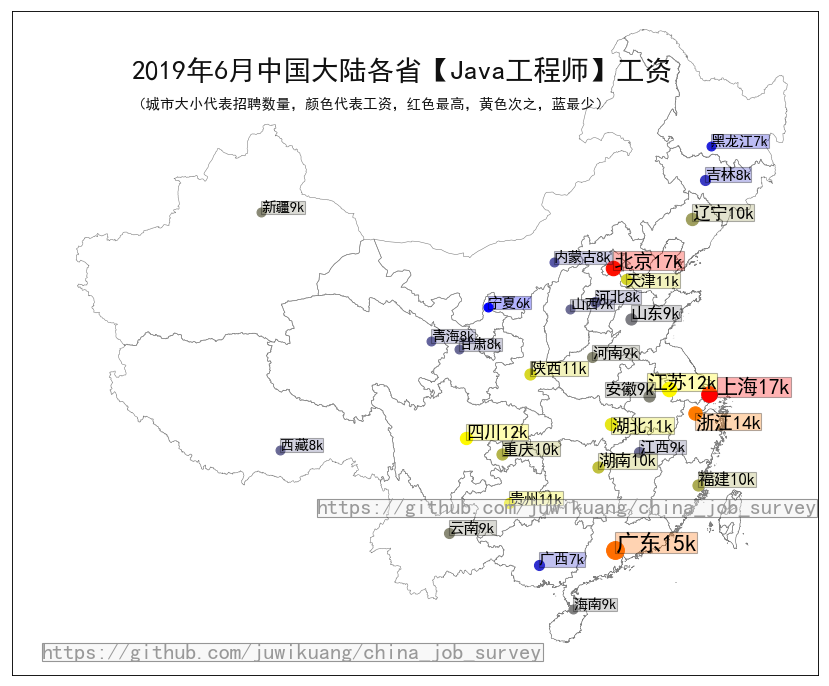

In [36]:
draw_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [37]:
get_summary(data[data.pl_python==1], 'Python程序员')

2019年6月全国招收Python程序员31753人。2019年6月全国Python程序员平均工资17877元，工资中位数15500元，其中95%的人的工资介于3750元到45000元。



In [38]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,22296,3750,20000,52000,4488,14.13%
上海,21324,5460,20000,45589,6508,20.50%
广东,18705,5122,17500,40000,7518,23.68%
浙江,16942,3676,15000,45000,1921,6.05%
山西,16677,7481,18242,28333,197,0.62%
天津,15489,5266,18500,22500,341,1.07%
江苏,15272,3646,14559,31519,3257,10.26%
海南,15192,4750,13875,35000,30,0.09%
四川,15041,4500,14000,34250,1388,4.37%
湖北,14570,4856,13000,32500,1355,4.27%


In [39]:
describe(data_python, 'Python程序员')

2019年6月北京招收Python程序员4488人。2019年6月北京Python程序员平均工资22296元，工资中位数20000元，其中95%的人的工资介于3750元到52000元。

2019年6月上海招收Python程序员6508人。2019年6月上海Python程序员平均工资21324元，工资中位数20000元，其中95%的人的工资介于5460元到45589元。

2019年6月广东招收Python程序员7518人。2019年6月广东Python程序员平均工资18705元，工资中位数17500元，其中95%的人的工资介于5122元到40000元。

2019年6月浙江招收Python程序员1921人。2019年6月浙江Python程序员平均工资16942元，工资中位数15000元，其中95%的人的工资介于3676元到45000元。

2019年6月山西招收Python程序员197人。2019年6月山西Python程序员平均工资16677元，工资中位数18242元，其中95%的人的工资介于7481元到28333元。

2019年6月天津招收Python程序员341人。2019年6月天津Python程序员平均工资15489元，工资中位数18500元，其中95%的人的工资介于5266元到22500元。

2019年6月江苏招收Python程序员3257人。2019年6月江苏Python程序员平均工资15272元，工资中位数14559元，其中95%的人的工资介于3646元到31519元。

2019年6月海南招收Python程序员30人。2019年6月海南Python程序员平均工资15192元，工资中位数13875元，其中95%的人的工资介于4750元到35000元。

2019年6月四川招收Python程序员1388人。2019年6月四川Python程序员平均工资15041元，工资中位数14000元，其中95%的人的工资介于4500元到34250元。

2019年6月湖北招收Python程序员1355人。2019年6月湖北Python程序员平均工资14570元，工资中位数13000元，其中95%的人的工资介于4856元到32500元。

2019年6月河南招收Python程序员395人。2019年6月河南Python程序员平均工资13195元，工资中位数12500

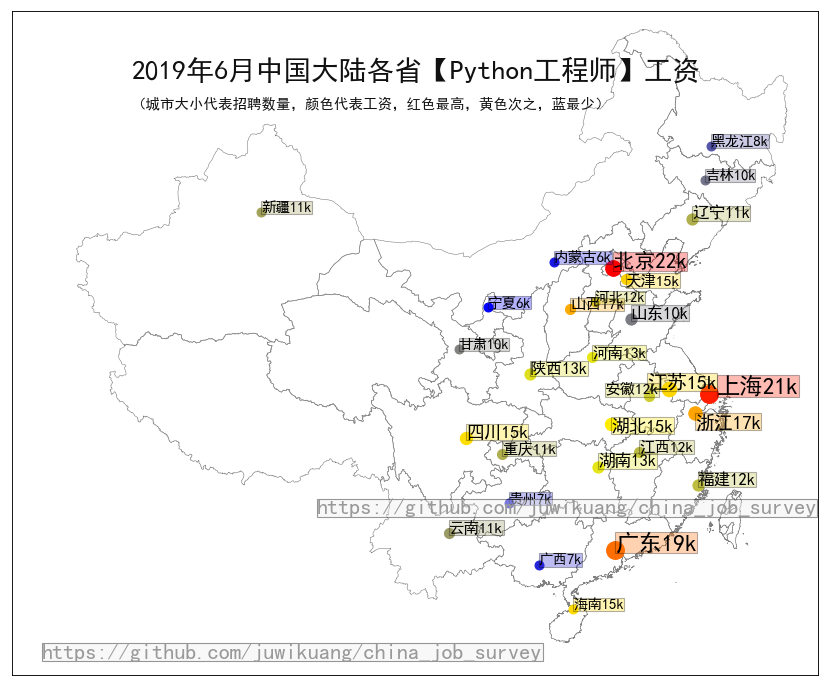

In [40]:
draw_map(data_python, 100,  f'2019年{month}月中国大陆各省【Python工程师】工资')